In [102]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import os 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patheffects
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from PIL import Image

In [103]:
yesterday_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
yesterday_date

'2024-03-26'

### 

# CHARGEMENT DES DONNEES

In [104]:
dialect = 'mysql+pymysql'
user = 'root'
password = os.getenv('mdp_mySQL')
host = 'localhost'
port = 3306
database_idf = 'SNCF_TGV_TER'

engine_url = f"{dialect}://{user}:{password}@{host}:{port}/{database_idf}"
engine = create_engine(engine_url)

In [105]:
query_disruption = f"""
SELECT * FROM disruptions_tgv_ter
WHERE data_date = '{yesterday_date}'
"""

df_disruption = pd.read_sql_query(query_disruption, engine)
df_disruption = df_disruption[df_disruption['arrival_delay']>=0]
df_disruption

,id_disruption,vehicle_id,train_type,id_stop,name_stop,lon,lat,disruption_start,disruption_end,arrival_delay,departure_delay,cause_delay,data_date
0,c7fbf186-7e36-4345-874f-3b9fea1abae9,SNCF:2024-03-26:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-26 18:46:00,2024-03-26 21:04:00,5.0,5.0,Conditions de départ non réunies,2024-03-26
1,c7fbf186-7e36-4345-874f-3b9fea1abae9,SNCF:2024-03-26:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87393702:LongDistanceTrain,Massy TGV,2.261250,48.7258,2024-03-26 18:46:00,2024-03-26 21:04:00,5.0,5.0,Conditions de départ non réunies,2024-03-26
2,c7fbf186-7e36-4345-874f-3b9fea1abae9,SNCF:2024-03-26:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-26 18:46:00,2024-03-26 21:04:00,0.0,0.0,Conditions de départ non réunies,2024-03-26
3,0cd69bcc-37c1-44c0-a9b7-8c90a73702ae,SNCF:2024-03-26:12250:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-26 08:46:00,2024-03-26 11:03:00,10.0,10.0,Régulation du trafic,2024-03-26
4,0cd69bcc-37c1-44c0-a9b7-8c90a73702ae,SNCF:2024-03-26:12250:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-26 08:46:00,2024-03-26 11:03:00,0.0,0.0,Régulation du trafic,2024-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441,dcd5b615-5148-4533-a47e-8566ce884c8a,SNCF:2024-03-26:9877:1187:LongDistanceTrain,TGV,stop_point:SNCF:87713040:LongDistanceTrain,Dijon,5.027260,47.3234,2024-03-26 07:24:00,2024-03-26 15:09:00,5.0,5.0,Régulation du trafic,2024-03-26
6442,dcd5b615-5148-4533-a47e-8566ce884c8a,SNCF:2024-03-26:9877:1187:LongDistanceTrain,TGV,stop_point:SNCF:87723197:LongDistanceTrain,Lyon Part Dieu,4.859410,45.7606,2024-03-26 07:24:00,2024-03-26 15:09:00,5.0,5.0,Régulation du trafic,2024-03-26
6443,dcd5b615-5148-4533-a47e-8566ce884c8a,SNCF:2024-03-26:9877:1187:LongDistanceTrain,TGV,stop_point:SNCF:87725689:LongDistanceTrain,Mâcon,4.824890,46.3026,2024-03-26 07:24:00,2024-03-26 15:09:00,5.0,5.0,Régulation du trafic,2024-03-26
6444,dcd5b615-5148-4533-a47e-8566ce884c8a,SNCF:2024-03-26:9877:1187:LongDistanceTrain,TGV,stop_point:SNCF:87751008:LongDistanceTrain,Marseille Saint-Charles,5.380410,43.3027,2024-03-26 07:24:00,2024-03-26 15:09:00,5.0,5.0,Régulation du trafic,2024-03-26


In [106]:
query_vehicle = f"""
SELECT * FROM vehicle_journeys_tgv_ter
WHERE data_date = '{yesterday_date}'
"""

df_vehicle = pd.read_sql_query(query_vehicle, engine)
df_vehicle['vehicle_id'] = df_vehicle['vehicle_id'].apply(lambda x: ':'.join(x.split(':')[1:]))
df_vehicle

,vehicle_id,route_id,time_begin,time_end,train_type,id_disruption,data_date
0,SNCF:2024-03-26:12244:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 18:46:00,0 days 20:59:00,Train grande vitesse,c7fbf186-7e36-4345-874f-3b9fea1abae9,2024-03-26
1,SNCF:2024-03-26:12250:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 08:46:00,0 days 10:53:00,Train grande vitesse,0cd69bcc-37c1-44c0-a9b7-8c90a73702ae,2024-03-26
2,SNCF:2024-03-26:12251:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 07:04:00,0 days 09:14:00,Train grande vitesse,None,2024-03-26
3,SNCF:2024-03-26:12254:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 10:46:00,0 days 12:53:00,Train grande vitesse,32e3d11d-9983-4370-b07e-cb8317fd78f5,2024-03-26
4,SNCF:2024-03-26:12255:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 11:04:00,0 days 13:14:00,Train grande vitesse,None,2024-03-26
...,...,...,...,...,...,...,...
8977,SNCF:2024-03-26:9890:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 05:59:00,0 days 09:43:00,Train grande vitesse,None,2024-03-26
8978,SNCF:2024-03-26:9894:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 17:01:00,0 days 21:01:00,Train grande vitesse,None,2024-03-26
8979,SNCF:2024-03-26:9896:1187:LongDistanceTrain,route:SNCF:CSR:071100,0 days 15:56:00,0 days 23:49:00,Train grande vitesse,None,2024-03-26
8980,SNCF:2024-03-26:9898:1187:LongDistanceTrain,route:SNCF:CSR:071200,0 days 06:31:00,0 days 14:15:00,Train grande vitesse,None,2024-03-26


In [107]:
df_lines = pd.read_sql_table('pt_lines_tgv_ter', engine)
df_lines = df_lines[df_lines['network_name'] != 'NightJet']
df_lines

,route_id,route_name,train_type,network_name,opening_time,closing_time
0,route:SNCF:0018-80100537-87271007,Dortmund Hbf - Paris Nord,Train grande vitesse,Eurostar,05:18:00,12:21:00
1,route:SNCF:0018-80101840-87271007,Essen Hbf - Paris Nord,Train grande vitesse,Eurostar,07:35:00,22:14:00
2,route:SNCF:0018-80154583-87271007,Köln - Hauptbahnhof - Paris Nord,Train grande vitesse,Eurostar,05:21:00,23:14:00
3,route:SNCF:0018-84000588-87111849,Amsterdam Centraal - Marne-la-Vallée - Chessy,Train grande vitesse,Eurostar,06:47:00,11:05:00
4,route:SNCF:0018-84000588-87271007,Amsterdam Centraal - Paris Nord,Train grande vitesse,Eurostar,06:11:00,23:43:00
...,...,...,...,...,...,...
363,route:stop_area:SNCF:87113001_stop_area:SNCF:8...,Paris Est - Strasbourg,Train grande vitesse,additional service,None,None
364,route:stop_area:SNCF:87394007_stop_area:SNCF:8...,Chartres - Versailles Chantiers,Train grande vitesse,additional service,None,None
365,route:stop_area:SNCF:87411017_stop_area:SNCF:8...,Rouen Rive Droite - Paris Saint-Lazare,Train grande vitesse,additional service,None,None
366,route:stop_area:SNCF:87411017_stop_area:SNCF:8...,Rouen Rive Droite - Le Havre,Train grande vitesse,additional service,None,None


# 

# 

# ANALYSE DES DONNEES

##### 

### NOMBRE DE PERTURBATION

In [108]:
nb_disruption = df_vehicle['id_disruption'].nunique()
print(f"nombre de perturbation : {nb_disruption}")

nombre de perturbation : 1170


##### 

### POURCENTAGE TRAJET IMPACTE

In [109]:
nb_vehicle_journeys = len(df_vehicle['vehicle_id'].unique())
print(f"nombre de trajet : {nb_vehicle_journeys}")

per_disrupted = nb_disruption/nb_vehicle_journeys*100
print(f"pourcentage de trajet pertubé : {round(per_disrupted,2)}%")

nombre de trajet : 8982
pourcentage de trajet pertubé : 13.03%


##### 

### TEMPS TOTAL DE PERTURBATION


In [110]:
df_disruption['duration'] = df_disruption['disruption_end'] - df_disruption['disruption_start']

In [111]:
df_disruption_unique = df_disruption[~df_disruption.duplicated(subset=['id_disruption'], keep='first')]

In [112]:
total_disruption_duration =  df_disruption_unique['duration'].sum()
print(f"temps cumulé de perturbation : {total_disruption_duration}")

temps cumulé de perturbation : 58 days 02:47:00


##### 

### INFORMATION SUR LA PREMIERE PERTURBATION DE LA JOURNEE

##### Merge des tables

In [113]:
df_merge_inter = pd.merge(df_vehicle, df_disruption.drop(['data_date','train_type'],axis=1), on=['vehicle_id','id_disruption'], how='left')
df_merge = pd.merge(df_merge_inter, df_lines.drop('train_type', axis=1), on='route_id', how='left')
df_merge = df_merge[~df_merge.duplicated(subset=['vehicle_id'], keep='first')]
df_merge

,vehicle_id,route_id,time_begin,time_end,train_type,id_disruption,data_date,id_stop,name_stop,lon,...,disruption_start,disruption_end,arrival_delay,departure_delay,cause_delay,duration,route_name,network_name,opening_time,closing_time
0,SNCF:2024-03-26:12244:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 18:46:00,0 days 20:59:00,Train grande vitesse,c7fbf186-7e36-4345-874f-3b9fea1abae9,2024-03-26,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.32051,...,2024-03-26 18:46:00,2024-03-26 21:04:00,5.0,5.0,Conditions de départ non réunies,0 days 02:18:00,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
3,SNCF:2024-03-26:12250:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 08:46:00,0 days 10:53:00,Train grande vitesse,0cd69bcc-37c1-44c0-a9b7-8c90a73702ae,2024-03-26,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.32051,...,2024-03-26 08:46:00,2024-03-26 11:03:00,10.0,10.0,Régulation du trafic,0 days 02:17:00,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
5,SNCF:2024-03-26:12251:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 07:04:00,0 days 09:14:00,Train grande vitesse,None,2024-03-26,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
6,SNCF:2024-03-26:12254:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 10:46:00,0 days 12:53:00,Train grande vitesse,32e3d11d-9983-4370-b07e-cb8317fd78f5,2024-03-26,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.32051,...,2024-03-26 10:46:00,2024-03-26 12:58:00,5.0,5.0,Panne de signalisation,0 days 02:12:00,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
8,SNCF:2024-03-26:12255:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 11:04:00,0 days 13:14:00,Train grande vitesse,None,2024-03-26,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14346,SNCF:2024-03-26:9890:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 05:59:00,0 days 09:43:00,Train grande vitesse,None,2024-03-26,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Strasbourg - Bruxelles-Midi / Brussel-Zuid,TGV INOUI,05:59:00,21:11:00
14347,SNCF:2024-03-26:9894:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 17:01:00,0 days 21:01:00,Train grande vitesse,None,2024-03-26,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Strasbourg - Bruxelles-Midi / Brussel-Zuid,TGV INOUI,05:59:00,21:11:00
14348,SNCF:2024-03-26:9896:1187:LongDistanceTrain,route:SNCF:CSR:071100,0 days 15:56:00,0 days 23:49:00,Train grande vitesse,None,2024-03-26,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Nancy - Nice,TGV INOUI,05:42:00,23:49:00
14349,SNCF:2024-03-26:9898:1187:LongDistanceTrain,route:SNCF:CSR:071200,0 days 06:31:00,0 days 14:15:00,Train grande vitesse,None,2024-03-26,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Montpellier Saint-Roch - Strasbourg,TGV INOUI,05:46:00,21:09:30


In [114]:
Not_NA = 0 
i = 0

while Not_NA == 0 :
    index_first_disruption = df_merge['disruption_start'].dropna().sort_values().index[i] 
    network_first_disruption = df_merge['network_name'][index_first_disruption]
    
    if pd.isna(network_first_disruption):
        i+=1
    else : 
        hour_first_disruption = df_merge['disruption_start'][index_first_disruption]
        cause_first_disruption = df_merge['cause_delay'][index_first_disruption]
        route_first_disruption = df_merge['route_name'][index_first_disruption]
        Not_NA = 1 

In [115]:
print(f"horaire de la première perturbation de la journée : {hour_first_disruption}")
print(f"cause de la perturbation : {cause_first_disruption}")
print(f"nom de la ligne impactée : {route_first_disruption}")
print(f"réseau : {network_first_disruption}")

horaire de la première perturbation de la journée : 2024-03-26 04:49:00
cause de la perturbation : Conditions de départ non réunies
nom de la ligne impactée : Strasbourg - Rothau
réseau : TER


##### 

### RESAUX LES PLUS PERTUBES (Graphique N°1) 


Note :
- Séparer le grapg en 4 (3 réseau par graph) car trop petit 
- Enlever le dernier point blanc + commencer par un point neutre
- Mettre le nom des réseaux plus au dessus à droite 

##### Extraction des informations à mettre dans les graphiques

In [116]:
# Calcul du nombre de trajets de chaque réseau 
vehicle_by_network = df_merge.groupby('network_name')['vehicle_id'].count()
vehicle_by_network

network_name
DB SNCF                    60
Eurostar                  112
Intercités                 48
Intercités de nuit          6
LEX                       111
OUIGO                      54
OUIGO Train Classique       6
TER                      3074
TER HDF                   368
TER NA                    233
TGV INOUI                 556
TGV Lyria                  31
Name: vehicle_id, dtype: int64

In [117]:
# Calcul du nombre de trajets perturbé par réseau
disrupted_vehicle_by_network = df_merge[df_merge['id_disruption'].notna()].groupby('network_name')['vehicle_id'].count()

# Gestion du cas (pas si rare que ca) où aucun trajet du réseau n'a été perturbé
for name in vehicle_by_network.index:
    if not(name in disrupted_vehicle_by_network.index):
        disrupted_vehicle_by_network[name] = 0
        
disrupted_vehicle_by_network

network_name
DB SNCF                   10
Eurostar                   5
Intercités                 8
LEX                        5
OUIGO                     15
OUIGO Train Classique      3
TER                      317
TER HDF                   84
TER NA                    25
TGV INOUI                 97
TGV Lyria                  6
Intercités de nuit         0
Name: vehicle_id, dtype: int64

In [118]:
# Calcul du pourcentage de perturbation pour chaque réseau
per_disrupted_vehicle_by_network = (disrupted_vehicle_by_network/vehicle_by_network *100).where(disrupted_vehicle_by_network >= 1, 0).sort_values(ascending=True)
per_disrupted_vehicle_by_network

network_name
Intercités de nuit        0.000000
Eurostar                  4.464286
LEX                       4.504505
TER                      10.312297
TER NA                   10.729614
DB SNCF                  16.666667
Intercités               16.666667
TGV INOUI                17.446043
TGV Lyria                19.354839
TER HDF                  22.826087
OUIGO                    27.777778
OUIGO Train Classique    50.000000
Name: vehicle_id, dtype: float64

In [119]:
# Calcul du retard total (à l'arrivée des gares) pour chaque réseau
total_delay_by_network = df_merge.groupby('network_name')['arrival_delay'].sum()

# Calcul du retard moyen par train pour chaque réseau
avg_delay_by_network = total_delay_by_network/vehicle_by_network

for i in range(len(disrupted_vehicle_by_network)):
    if not(disrupted_vehicle_by_network.index[i] in total_delay_by_network.index) : 
        avg_delay_by_network[i] = 0
        
# Conversion en string indicant les retards moyens en seconde
for i in range(len(avg_delay_by_network)):
    if avg_delay_by_network[i] != 0:
        avg_delay_by_network[i] = str(int(avg_delay_by_network[i]*60)) + " secondes" 
    else : 
        avg_delay_by_network[i] = "0 seconde"
    
print(f"temps moyen de retard par train en seconde pour chaque réseau : \n\n {avg_delay_by_network}")

temps moyen de retard par train en seconde pour chaque réseau : 

 network_name
DB SNCF                  35 secondes
Eurostar                 66 secondes
Intercités               12 secondes
Intercités de nuit         0 seconde
LEX                      16 secondes
OUIGO                    83 secondes
OUIGO Train Classique    50 secondes
TER                      36 secondes
TER HDF                  52 secondes
TER NA                   23 secondes
TGV INOUI                71 secondes
TGV Lyria                58 secondes
dtype: object


In [128]:
# Informations à placer sur le graphique
info = [vehicle_by_network, disrupted_vehicle_by_network, avg_delay_by_network]
info_name = ["Nombre de trajet", "Nombre de trajet \n perturbé", "Retard moyen \n par train"]

##### Graphiques

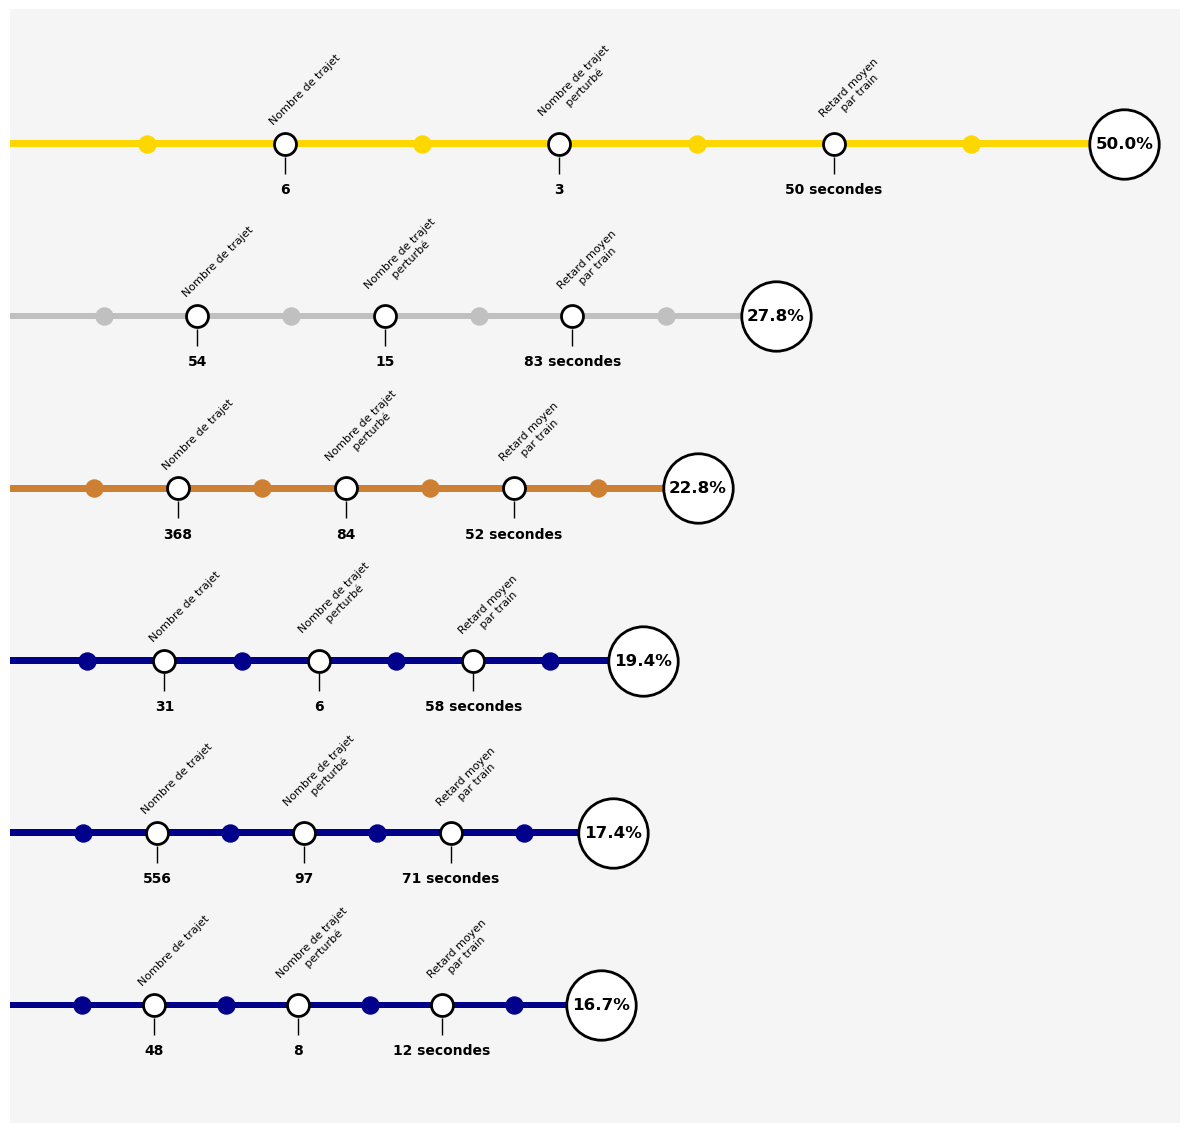

In [131]:
# Filtrage des éléments désirés directement avec Pandas
per_disrupted_vehicle_by_network_part1 = per_disrupted_vehicle_by_network.iloc[6:]

# Création d'une nouvelle Series avec les transformations souhaitées
transformation = (per_disrupted_vehicle_by_network_part1 + 20) * 0.1

# Configuration initiale de la figure
fig, ax = plt.subplots(figsize=(12, 12))
colors = ['darkblue', 'darkblue', 'darkblue', "#CD7F32", "#C0C0C0", "#FFD700"]

# Création du diagramme à barres horizontales
bars = ax.barh(transformation.index, transformation, color=colors, height=0.04)

# Calcul des positions pour les marqueurs
x_positions = transformation + 0.1

# Ajout de marqueurs blancs
ax.scatter(x_positions, transformation.index, facecolors='white', edgecolors='black', linewidths=2, s=2500)

# Définition des intervalles pour les éléments décoratifs
intervals_white = [2/8, 4/8, 6/8]
intervals_black = [1/8, 3/8, 5/8, 7/8]

# Boucle pour ajouter du texte et des décorations supplémentaires sur les barres
for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    
    # Ajout de texte pour le pourcentage
    ax.text(new_x, y, f'{bar.get_width()/0.1 - 20:.1f}%', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Ajout de cercles et de lignes avec du texte
    for i, interval in enumerate(intervals_white):
        circle_x = bar.get_width() * interval
        # Ajouter cercle blanc et ligne
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=250)
        ax.vlines(circle_x, y - 0.075, y - 0.175, colors='black', linewidth=1)
        # Ajouter texte spécifique sous la ligne
        current_info_value = info[i][transformation.index[j]]
        ax.text(circle_x, y - 0.225, f'{current_info_value}', ha='center', va='top', fontsize=10, fontweight='bold')
        # Ajouter texte spécifique au-dessus du cercle
        ax.text(circle_x + 0.13, y + 0.1, info_name[i], ha='center', va='bottom', fontsize=8, rotation=45)
        
    # Ajout de cercles colorés pour les intervalles neutre
    for interval in intervals_black:
        circle_x = bar.get_width() * interval
        ax.scatter(circle_x, y, facecolors=colors[j], s=150)

# Configuration finale du graphique
ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)
plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Perturbation_ligne_part1.png", dpi = 300)
plt.show()

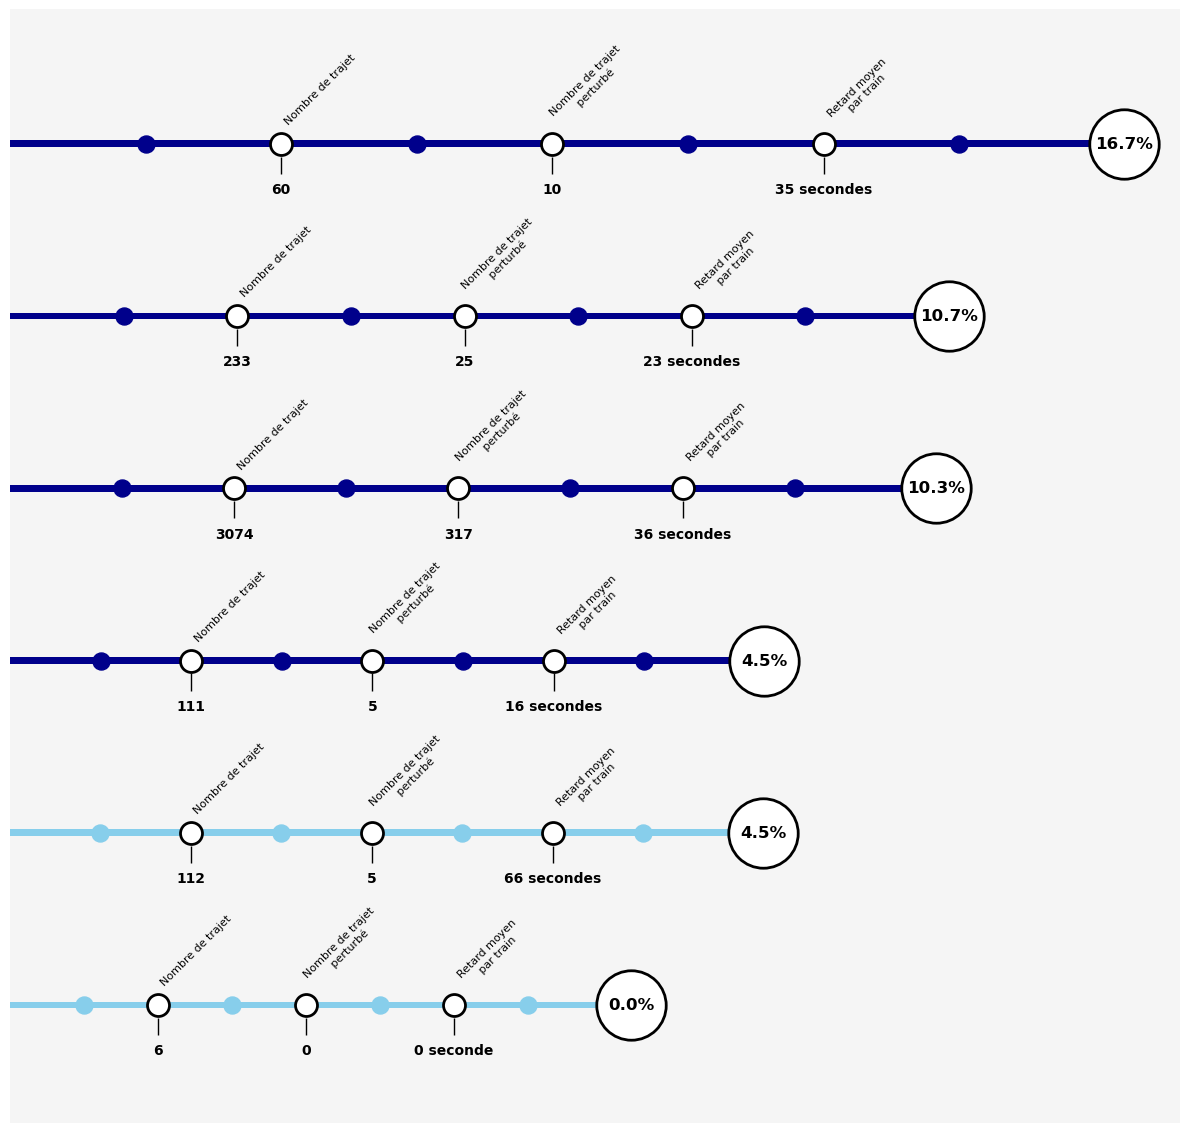

In [137]:
per_disrupted_vehicle_by_network_part1 = per_disrupted_vehicle_by_network.iloc[:6]

# Création d'une nouvelle Series avec les transformations souhaitées
transformation = (per_disrupted_vehicle_by_network_part1 + 20) * 0.1

# Configuration initiale de la figure
fig, ax = plt.subplots(figsize=(12, 12))
colors = ['skyblue', 'skyblue', 'darkblue', "darkblue", "darkblue", "darkblue"]

# Création du diagramme à barres horizontales
bars = ax.barh(transformation.index, transformation, color=colors, height=0.04)

# Calcul des positions pour les marqueurs
x_positions = transformation + 0.1

# Ajout de marqueurs blancs
ax.scatter(x_positions, transformation.index, facecolors='white', edgecolors='black', linewidths=2, s=2500)

# Définition des intervalles pour les éléments décoratifs
intervals_white = [2/8, 4/8, 6/8]
intervals_black = [1/8, 3/8, 5/8, 7/8]

# Boucle pour ajouter du texte et des décorations supplémentaires sur les barres
for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    
    # Ajout de texte pour le pourcentage
    ax.text(new_x, y, f'{bar.get_width()/0.1 - 20:.1f}%', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Ajout de cercles et de lignes avec du texte
    for i, interval in enumerate(intervals_white):
        circle_x = bar.get_width() * interval
        # Ajouter cercle blanc et ligne
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=250)
        ax.vlines(circle_x, y - 0.075, y - 0.175, colors='black', linewidth=1)
        # Ajouter texte spécifique sous la ligne
        current_info_value = info[i][transformation.index[j]]
        ax.text(circle_x, y - 0.225, f'{current_info_value}', ha='center', va='top', fontsize=10, fontweight='bold')
        # Ajouter texte spécifique au-dessus du cercle
        ax.text(circle_x + 0.13, y + 0.1, info_name[i], ha='center', va='bottom', fontsize=8, rotation=45)
        
    # Ajout de cercles colorés pour les intervalles noirs
    for interval in intervals_black:
        circle_x = bar.get_width() * interval
        ax.scatter(circle_x, y, facecolors=colors[j], s=150)

# Configuration finale du graphique
ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)
plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Perturbation_ligne_part1.png", dpi = 300)
plt.show()

## 

### ROUTES LES PLUS PERTUBEES (graphique à faire)

In [140]:
vehicle_by_route = df_merge.groupby('route_name')['vehicle_id'].count()
vehicle_by_route = vehicle_by_route[vehicle_by_route >= 10]
vehicle_by_route

route_name
(Namur) - (Charleroi) - Maubeuge    18
Alençon - Château Du Loir           12
Ambérieu - Chambery                 12
Amsterdam Centraal - Paris Nord     11
Angers St Laud - Le Mans            25
                                    ..
Tours - Le Croisic                  16
Tours - Loches                      12
Tours - Saumur - Angers - Nantes    11
Wissembourg - Neustadt              32
YVETOT - ROUEN - ELBEUF             32
Name: vehicle_id, Length: 170, dtype: int64

In [141]:
# Calcul du nombre de perturbation par ligne (route)
disrupted_vehicle_by_route = df_merge[df_merge['id_disruption'].notna()].groupby('route_name')['vehicle_id'].count()
disrupted_vehicle_by_route

route_name
(Namur) - (Charleroi) - Maubeuge    1
11. Poitiers-Tours                  1
Alençon - Château Du Loir           1
Alençon - Le Mans - Tours           1
Ambérieu - Chambery                 1
                                   ..
Tours-Vendôme-Châteaudun            1
Tours-Voves-Chartres                3
Valence - Avignon - Marseille       2
Valenciennes - Paris Nord           1
Wissembourg - Neustadt              8
Name: vehicle_id, Length: 202, dtype: int64

In [144]:
per_disrupted_vehicle_by_route = disrupted_vehicle_by_route/vehicle_by_route *100

In [145]:
winners = per_disrupted_vehicle_by_route.sort_values(ascending=True)[:10]
nb_train_winners = vehicle_by_route[winners.index]

print(f"Les 10 routes les moins impactées (min 10 trajets)\n\n {winners} \n\n\n")
print(f"Nombre de trajet des 10 routes les moins impactées\n\n {nb_train_winners}")

Les 10 routes les moins impactées (min 10 trajets)

 route_name
Annemasse - Suisse                      1.587302
LER                                     2.000000
Lyon Saint-Paul - Brignais              2.380952
Nancy - Pont St Vincent                 2.564103
Marseille - Toulon - Hyeres             3.448276
L23                                     3.571429
F43                                     3.571429
Nimes - Genolhac                        3.703704
L16                                     3.703704
CAEN- COUTANCES - GRANVILLE - RENNES    3.846154
Name: vehicle_id, dtype: float64 



Nombre de trajet des 10 routes les moins impactées

 route_name
Annemasse - Suisse                      63
LER                                     50
Lyon Saint-Paul - Brignais              42
Nancy - Pont St Vincent                 39
Marseille - Toulon - Hyeres             58
L23                                     28
F43                                     28
Nimes - Genolhac                        27
L

In [146]:
losers = per_disrupted_vehicle_by_route.sort_values(ascending=False)[:10]
nb_train_losers = vehicle_by_route[losers.index]

print(f"Les 10 routes les plus impactées (min 10 trajets)\n\n {losers} \n\n\n")
print(f"Nombre de trajet des 10 routes les plus impactées\n\n {nb_train_losers}")

Les 10 routes les plus impactées (min 10 trajets)

 route_name
Rennes - Chateaubriant                             70.000000
K40                                                60.869565
P44                                                50.000000
P42                                                50.000000
C40                                                44.186047
F42                                                41.666667
Paris Est - Frankfurt am Main - Hauptbahnhof       41.666667
Marseille - Miramas - Avignon Tgv Via Cavaillon    40.540541
Annecy - Paris - Gare de Lyon - Hall 1 & 2         40.000000
Paris Est - Karlsruhe Hauptbahnhof                 40.000000
Name: vehicle_id, dtype: float64 



Nombre de trajet des 10 routes les plus impactées

 route_name
Rennes - Chateaubriant                             10
K40                                                23
P44                                                24
P42                                                20
C40        

## 

### ARRETS LES PLUS IMPACTES (Graphique N°2)

Note : 
- Trouver shapefille de l'Europe
- Mettre police d'écriture de météo france
- Ecrire le nombre de perturbation pour chaque gare le plus loin possible des autres textes/gares
- couleurs de la carte qui varie selon les valuers autour 

In [152]:
most_impacted_stop = df_merge.groupby('name_stop')['vehicle_id'].count().sort_values(ascending=False)[:50]

print(f"Arrets les plus impactés par les perturbations : \n\n {most_impacted_stop}")

Arrets les plus impactés par les perturbations : 

 name_stop
Lille Flandres                             50
Bordeaux Saint-Jean                        30
Paris - Montparnasse - Hall 1 & 2          26
Strasbourg                                 26
Paris Nord                                 23
Paris - Gare de Lyon - Hall 1 & 2          18
Paris Est                                  16
Toulouse Matabiau                          15
Paris Saint-Lazare                         15
Luxembourg                                 14
Genève Cornavin                            14
Orléans                                    14
Vitrolles - Aéroport Marseille Provence    13
Nantes                                     13
Nancy                                      12
Reims                                      12
Chambéry - Challes-les-Eaux                11
Lyon Part Dieu                             11
Les Cauquillous                            11
Basel SBB                                  10
Lyon - Jean Macé  

##### Regroupement ville/gare tres proche

In [153]:
stops_lon_lat = df_merge[df_merge['name_stop'].isin(most_impacted_stop.index)].groupby('name_stop').agg({'lon': 'first', 'lat': 'first'}).reset_index()

In [156]:
most_impacted_stop =  most_impacted_stop.sort_index()
most_impacted_stop_new = {}
name_to_ereased = []

for i in range(len(most_impacted_stop)):
    count_disruption_city = most_impacted_stop.iloc[i]

    for j in range(i + 1, len(most_impacted_stop)):
        if (int(stops_lon_lat['lon'].iloc[i] * 10) / 10 == int(stops_lon_lat['lon'].iloc[j] * 10) / 10) and \
           (int(stops_lon_lat['lat'].iloc[i] * 10) / 10 == int(stops_lon_lat['lat'].iloc[j] * 10) / 10):
            count_disruption_city += most_impacted_stop.iloc[j]        
            name_to_ereased.append(most_impacted_stop.index[j])
    
    most_impacted_stop_new[most_impacted_stop.index[i]] = count_disruption_city    
    
most_impacted_stop_new = pd.Series(most_impacted_stop_new, name="Total Disruptions").drop(name_to_ereased)

##### Suppression de la gare la moins perturbée quand regroupement de gare proche mais pas suffisement pour former un meme point

In [159]:
stops_lon_lat_new = df_disruption[df_disruption['name_stop'].isin(most_impacted_stop_new.index)].groupby('name_stop').agg({'lon': 'first', 'lat': 'first'}).reset_index()

In [160]:
name_to_erase = []

for i in range(len(most_impacted_stop_new)):
    list_stop = [(most_impacted_stop_new.index[i], most_impacted_stop_new.iloc[i])]
    for j in range(i + 1, len(most_impacted_stop_new)):
        if abs(stops_lon_lat_new['lon'].iloc[i] - stops_lon_lat_new['lon'].iloc[j]) < 0.5 and \
           abs(stops_lon_lat_new['lat'].iloc[i] - stops_lon_lat_new['lat'].iloc[j]) < 0.5:
            list_stop.append((most_impacted_stop_new.index[j], most_impacted_stop_new.iloc[j]))
    
    if len(list_stop) > 1:
        list_stop.sort(key=lambda x: x[1])
        name_to_erase.extend([idx for idx, _ in list_stop[:-1]])

name_to_erase = list(set(name_to_erase))

most_impacted_stop_new_V2 = most_impacted_stop_new.drop(name_to_erase)

##### Graphique

In [164]:
stops_lon_lat_new_v2 = df_disruption[df_disruption['name_stop'].isin(most_impacted_stop_new_V2.index)].groupby('name_stop').agg({'lon': 'first', 'lat': 'first'}).reset_index()

longitudes = list(stops_lon_lat_new_v2['lon'])
latitudes = list(stops_lon_lat_new_v2['lat'])

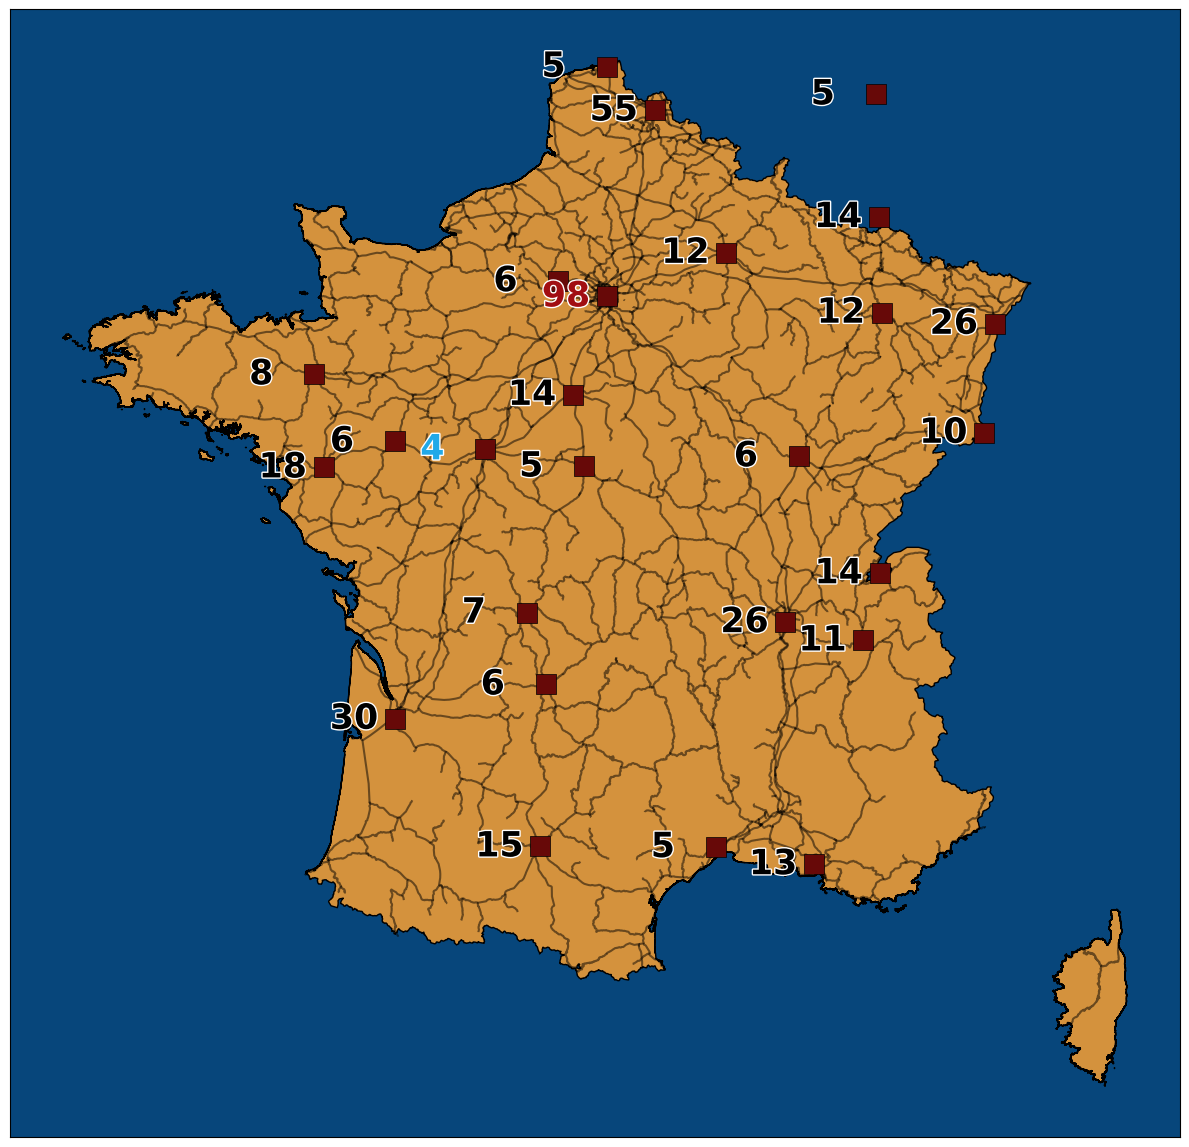

In [165]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('#07467b')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Chargement et affichage des données géospatiales
france = gpd.read_file('data/France/FRA_adm0.shp')
reseau = gpd.read_file('formes-des-lignes-du-rfn/formes-des-lignes-du-rfn.shp')
# Plot de la carte de France
france.plot(ax=ax, color='#d4923d', edgecolor='black', zorder=2) 
# Plot du réseau sur la carte
reseau.plot(ax=ax, color='black', alpha=0.5)

# Ajout des points d'arrêts impactés
ax.scatter(longitudes, latitudes, s=200, color='#670908', edgecolor='black', linewidth=0.5, zorder=3, alpha=1, marker='s')

# Boucle pour afficher le nombre de perturbations par arrêt
for lon, lat, value in zip(longitudes, latitudes, list(most_impacted_stop_new_V2)):
    # Ajustement de la position du texte en fonction de la valeur
    minuslon = 1.3 if value >= 100 else 0.9
    
    # Effet de texte pour améliorer la lisibilité
    text_effect = patheffects.withStroke(linewidth=2, foreground="white")
    
    # Couleur du texte en fonction de la valeur
    if value == max(most_impacted_stop_new_V2):
        color = '#a10e12'  # Couleur pour la valeur maximale
    elif value == min(most_impacted_stop_new_V2):
        color = '#21a9e8'  # Couleur pour la valeur minimale
    else:
        color = 'black'  # Couleur par défaut

    # Affichage du texte
    ax.text(lon - minuslon, lat, str(value), verticalalignment='center', fontsize=25, color=color, fontweight='bold', path_effects=[text_effect])

# Finalisation et sauvegarde de la figure
plt.tight_layout()
plt.savefig("Meteo_retard_couleur.png", dpi=300)
plt.show()

## 

### NOMBRE DE PERTURBATION AU FIL DE LA JOURNEE ET CAUSE DE PERTURBATION (Graphique N°3) 

#####  Causes de perturbations

In [170]:
causes_disruption = df_merge.groupby('cause_delay')['id_disruption'].count().sort_values(ascending=True)

print(f"cause de perturbation les moins fréquentes de la journée : \n\n {causes_disruption}")

cause de perturbation les moins fréquentes de la journée : 

 cause_delay
Conditions météorologiques                                 1
Déclenchement du signal d'alarme                           1
Modification de matériel                                   2
Affluence de voyageurs entraînant un arrêt prolongé        2
Heurt d'un animal                                          2
Erreur d'itinéraire                                        2
Acte de vandalisme                                         3
Dérangement d'un équipement technique ou informatique      3
Arrêt exceptionnel en gare                                 4
Dérangement d'une installation en gare                     4
Indisponibilité d'un matériel                              5
Incident de circulation                                    6
Incident technique sur la voie                             6
Saturation des voies en gare                               6
Ralentissement par manque d'adhérence                      7
Interventio

In [171]:
# Calcul pourcentage d'apparition des différentes causes de perturbations
per_causes_disruption = causes_disruption/sum(causes_disruption)*100
per_causes_disruption

cause_delay
Conditions météorologiques                                0.151286
Déclenchement du signal d'alarme                          0.151286
Modification de matériel                                  0.302572
Affluence de voyageurs entraînant un arrêt prolongé       0.302572
Heurt d'un animal                                         0.302572
Erreur d'itinéraire                                       0.302572
Acte de vandalisme                                        0.453858
Dérangement d'un équipement technique ou informatique     0.453858
Arrêt exceptionnel en gare                                0.605144
Dérangement d'une installation en gare                    0.605144
Indisponibilité d'un matériel                             0.756430
Incident de circulation                                   0.907716
Incident technique sur la voie                            0.907716
Saturation des voies en gare                              0.907716
Ralentissement par manque d'adhérence             

In [179]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8982 entries, 0 to 14350
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   vehicle_id        8982 non-null   object         
 1   route_id          8982 non-null   object         
 2   time_begin        8982 non-null   timedelta64[ns]
 3   time_end          8982 non-null   timedelta64[ns]
 4   train_type        8982 non-null   object         
 5   id_disruption     1170 non-null   object         
 6   data_date         8982 non-null   object         
 7   id_stop           712 non-null    object         
 8   name_stop         712 non-null    object         
 9   lon               712 non-null    float64        
 10  lat               712 non-null    float64        
 11  disruption_start  712 non-null    datetime64[ns] 
 12  disruption_end    712 non-null    datetime64[ns] 
 13  arrival_delay     712 non-null    float64        
 14  departure_de

In [181]:
df_disruption_unique = df_disruption.drop_duplicates(['id_disruption','vehicle_id'])

start = [t.time() for t in df_disruption_unique['disruption_start']]
end = [t.time() for t in df_disruption_unique['disruption_end']]

In [182]:
start_time = datetime(2023, 1, 1, 0, 0) 
end_time = datetime(2023, 1, 2, 0, 0)  

ten_intervals = []
current_time = start_time
while current_time < end_time:
    ten_intervals.append(current_time.time())
    current_time += timedelta(minutes=10)

In [183]:
hours_intervals_name = []
count=6

for t in range(0,len(ten_intervals)):
    if count == 6 :
        hours_intervals_name.append(str(ten_intervals[t])[:5])
        count=0
    else :
        hours_intervals_name.append('')
    count+= 1

In [184]:
disrupiton_by_ten = []

for time in ten_intervals:
    nb_disruption = 0
    for i in range(len(start)):
        if time > start[i] and time < end[i]:
            nb_disruption += 1 
    disrupiton_by_ten.append(nb_disruption)

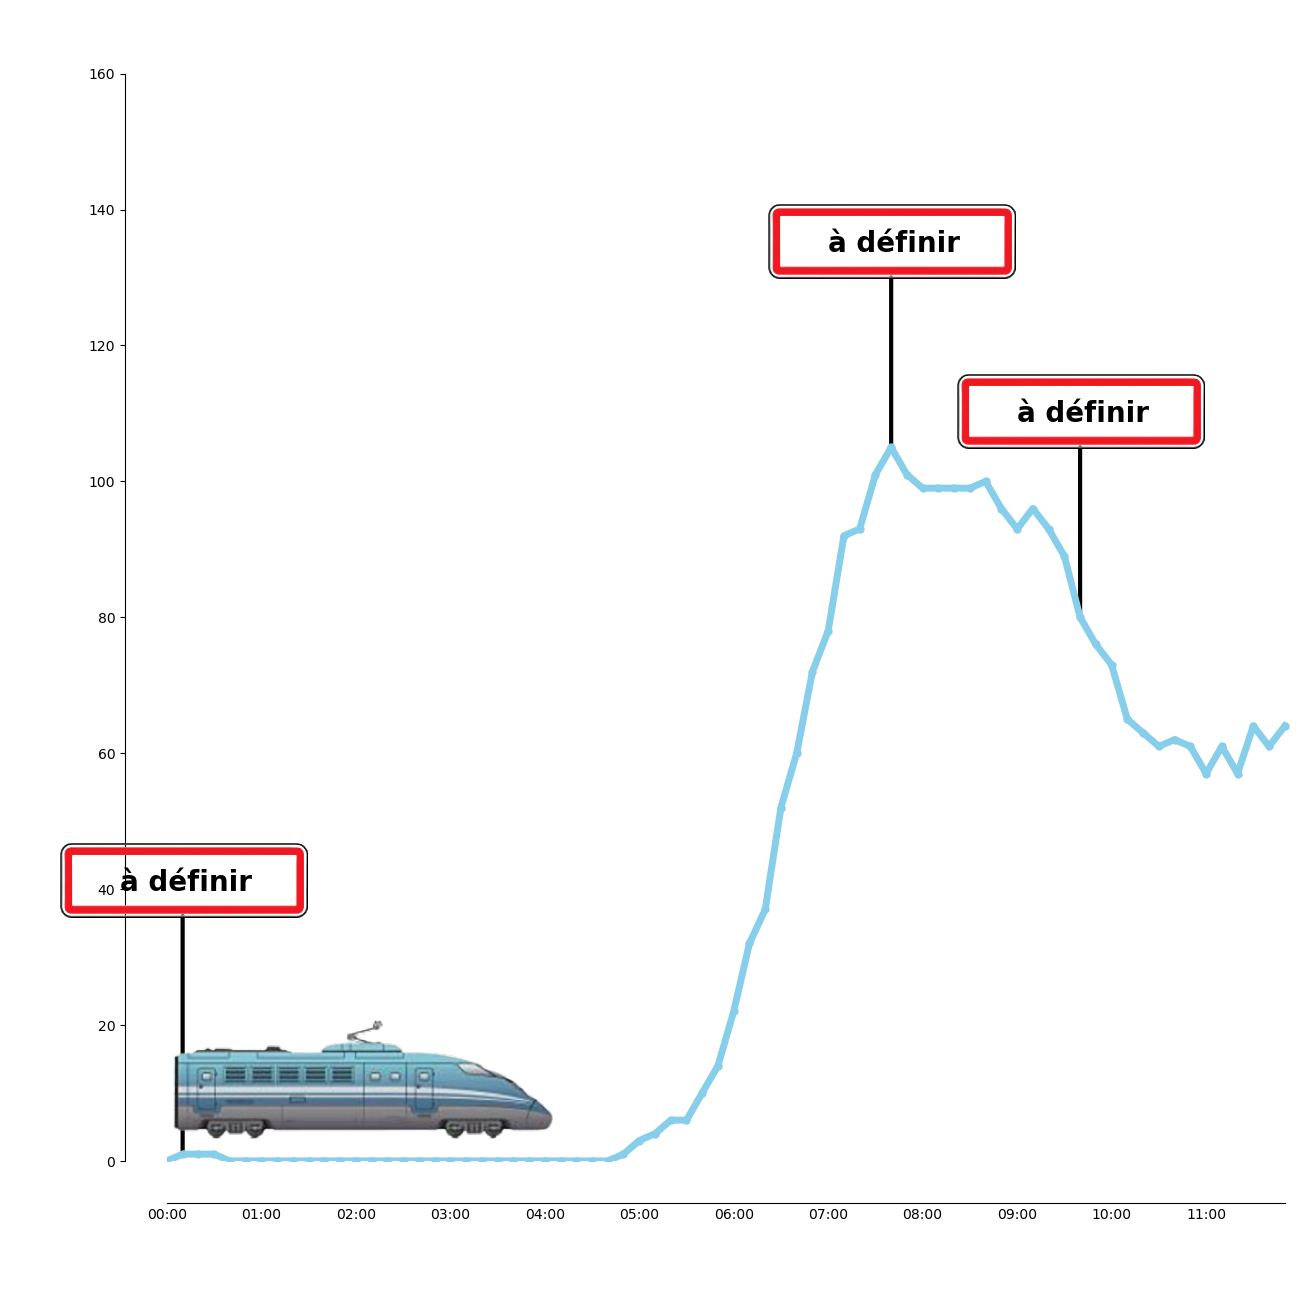

In [185]:
disrupiton_by_ten_1 = disrupiton_by_ten[:72]

plt.figure(figsize=(12, 12))
plt.plot(range(len(disrupiton_by_ten_1)), disrupiton_by_ten_1, c='skyblue', lw=5, marker='o', markersize=5)
plt.xticks(range(len(disrupiton_by_ten_1)), hours_intervals_name[:72])
plt.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

#xlim et ylim
plt.xlim(0, len(disrupiton_by_ten_1)) 
max_y_value = max(disrupiton_by_ten)*1.4
plt.ylim(0, max_y_value)  


# Image du train
img = mpimg.imread('Data/train_wb.png')
imagebox = OffsetImage(img, zoom=0.8)
ab = AnnotationBbox(imagebox, (13.5, 14), frameon=False)
plt.gca().add_artist(ab)


# Point de départ
start_value = [x for x in disrupiton_by_ten_1 if x != 0][0]
start_index = disrupiton_by_ten_1.index(start_value)

# Premier arret
max_value = max(disrupiton_by_ten_1)
max_index = disrupiton_by_ten_1.index(max_value)


# Deuxieme arret
max_value_2 = max(disrupiton_by_ten_1[max_index+12:])
max_index_2 = disrupiton_by_ten_1.index(max_value_2)


list_value = [start_value, max_value,max_value_2]
list_index = [start_index, max_index,max_index_2]


img_arrets = mpimg.imread('Data/arrets_wb.png')
imagebox_arrets = OffsetImage(img_arrets, zoom=0.2)
    
for i in range(len(list_value)):

    if i == 0 :
        y_offset = list_value[i] + 40 
    else : 
        y_offset = list_value[i] + 30 
        
    ab_arrets = AnnotationBbox(imagebox_arrets, (list_index[i], y_offset), frameon=False)
    plt.gca().add_artist(ab_arrets)

    xyA = (list_index[i], y_offset-5)  
    xyB = (list_index[i], list_value[i])

    con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",lw=3, mutation_scale=10)

    plt.gca().add_artist(con)
    
    plt.text(list_index[i]-4, y_offset, 'à définir', verticalalignment='center', fontsize=20, color='black', fontweight='bold')

sns.despine(offset=30, trim=True)
plt.savefig("Perturbation_journée_part1.png", dpi=300)
plt.show()

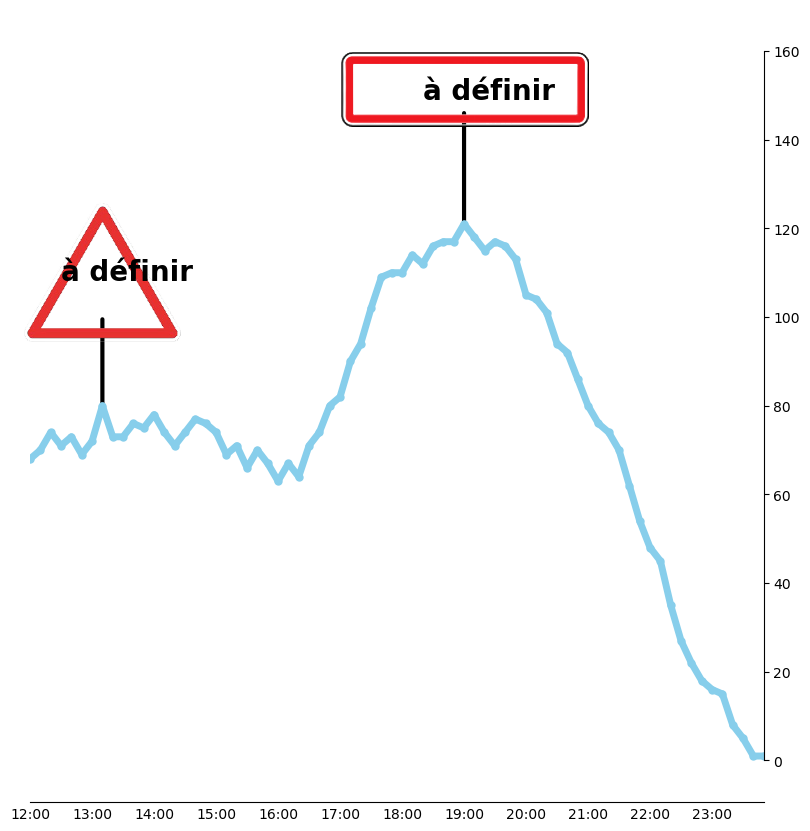

In [187]:
disrupiton_by_ten_2 = disrupiton_by_ten[72:]

plt.figure(figsize=(8, 8))
plt.plot(range(len(disrupiton_by_ten_2)), disrupiton_by_ten_2, c='skyblue', lw=5, marker='o', markersize=5)
plt.xticks(range(len(disrupiton_by_ten_2)), hours_intervals_name[72:],)
plt.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

# xlim et ylim
plt.xlim(0, len(disrupiton_by_ten_2)-1) 
max_y_value = max(disrupiton_by_ten_2)*1.4
plt.ylim(0, max_y_value)  


#Premier danger 
danger_value = max(disrupiton_by_ten_2[:12])
danger_index = disrupiton_by_ten_2.index(danger_value)

# Premier arret
max_value = max(disrupiton_by_ten_2)
max_index = disrupiton_by_ten_2.index(max_value)


list_value = [danger_value, max_value]
list_index = [danger_index, max_index]
list_image = ['danger_wb','arrets_wb']
list_zoom = [0.5,0.2]
    
for i in range(len(list_value)):
    
    img_arrets = mpimg.imread(f'Data/{list_image[i]}.png')
    imagebox_arrets = OffsetImage(img_arrets, zoom=list_zoom[i])
    
    y_offset = list_value[i] + 30 
        
    ab_arrets = AnnotationBbox(imagebox_arrets, (list_index[i], y_offset), frameon=False)
    plt.gca().add_artist(ab_arrets)

    if list_image[i] == 'danger_wb':
        xyA = (list_index[i], y_offset-10.5)
    else :
        xyA = (list_index[i], y_offset-5)

    xyB = (list_index[i], list_value[i])

    con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",lw=3, mutation_scale=10)

    plt.gca().add_artist(con)
    
    plt.text(list_index[i]-4, y_offset, 'à définir', verticalalignment='center', fontsize=20, color='black', fontweight='bold')


sns.despine(offset=30, trim=True)

ax = plt.gca()
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.yaxis.tick_right()

plt.savefig("Perturbation_journée_part2.png", dpi=300)
plt.show()

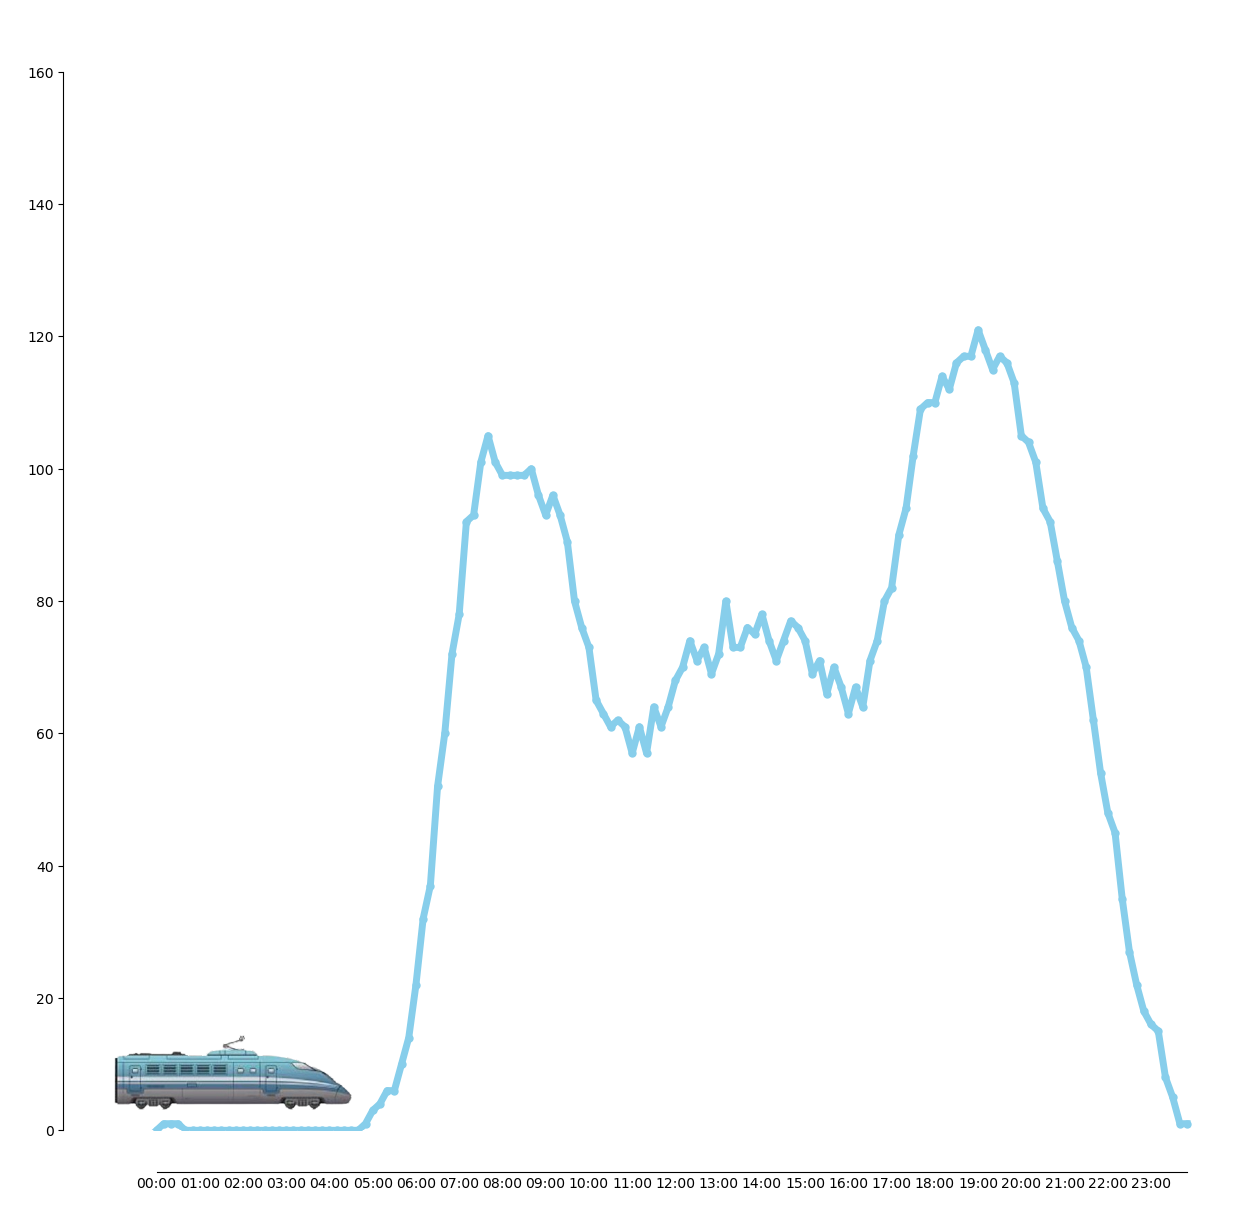

In [188]:
plt.figure(figsize=(12, 12))
plt.plot(range(len(disrupiton_by_ten)), disrupiton_by_ten, c='skyblue', lw=5, marker='o', markersize=5)
plt.xticks(range(len(disrupiton_by_ten)), hours_intervals_name, rotation=30, fontsize=14)
plt.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

# xlim et ylim
max_y_value = max(disrupiton_by_ten) * 1.4
plt.ylim(0, max_y_value)  

# Image du train
img = mpimg.imread('Data/train_wb.png')
imagebox = OffsetImage(img, zoom=0.5)
ab = AnnotationBbox(imagebox, (12, 10), frameon=False)
plt.gca().add_artist(ab)

sns.despine(offset=30, trim=True)
plt.savefig("Test_remplissage.png", dpi=300)
plt.show()
